# Regresión Lineal con Árbol de decisión

In [1]:
# Importamos librerías
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Genero un dataset aleatorio con una variable X y una variable Y
X = np.linspace(-5 , 5, 1000).reshape(1000, 1)
y_limpia = np.sin(3 * X) + X

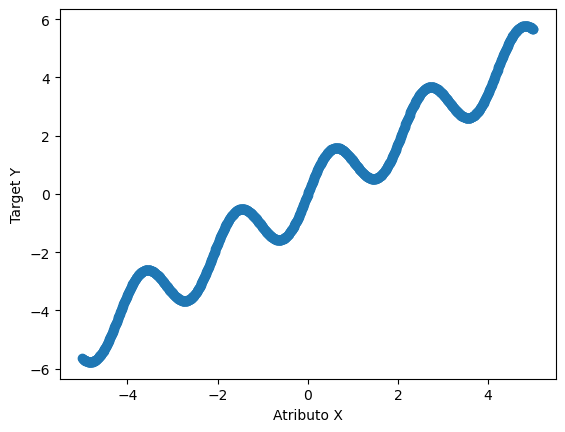

In [3]:
# Represento los datos
plt.scatter(X, y_limpia)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

In [4]:
# Añado ruido a la salida Y para tener una función menos "ideal"
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido

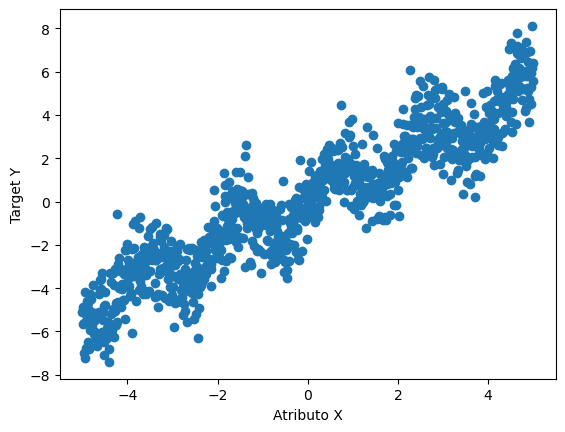

In [5]:
plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

In [6]:
# Divido en dos datasets, train (con el que optimizo los hiperparámetros) y test (con el que 
# pruebo el rendimiento del modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

Documentación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Ya tenemos los datos separados en Train y Test. Los datos de Train, a su vez, se dividen en distintos conjuntos con lo que se conoce como validación cruzada. El método `GridSearchCV` realiza esa validación cruzada automáticamente. Además, este método se utiliza para optimizar los parámetros aplicando todas sus combinaciones posibles.

En este caso, el parámetro a optimizar es `max_depth`. Se prueban valores entre 3 y 7 y se elige como óptimo el que mejores resultados tenga en los conjuntos de validación por medio de validación cruzada. 

En este caso `max_depth` tiene 5 valores  que son: 3, 4, 5, 6 y 7. Utilizando `GridSearchCV` se ajusta un modelo utilizando `max_depth=3`, se divide (X_train,Y_train) en 3 conjuntos ya que cv=3. Se halla la métrica media de validación en esos tres conjuntos, la cual será la métrica de `max_depth=3`. Posteriormente se utiliza `max_depth=4` y se vuelve a optener la métrica media de validación en esos tres conjuntos. Análogamente para `max_depth = 5,6,7`. El valor de max_depth que mejor métrica media obtenga es el mejor parámetro.

Posteriormente, el método predict(X) obtiene la predicción utilizando los mejores parámetros calculados con `GridSearchCV`.


In [7]:
# Obtengo el mejor parámetro de profundidad del árbol entre 3 y 7 usando 
# validación cruzada y gridsearch
regr = DecisionTreeRegressor()

In [8]:
params = {
    "max_depth": range(3, 7)
}

regr_opt = GridSearchCV(regr, params, cv=3)

In [9]:
regr_opt.fit(X_train, y_train)

print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=3)


In [10]:
y_train_pred = regr_opt.predict(X_train)
y_test_pred  = regr_opt.predict(X_test)

In [11]:
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 0.89
La R^2 en los datos de test es: 0.89


In [12]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)

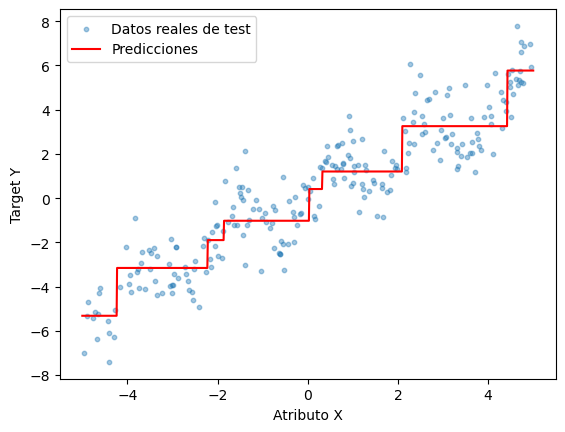

In [13]:
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

Se muestran los datos y el ajuste del modelo de árbol de decisión con el parámetro óptimo (max_depth=3). Como se muestra ajusta bastante bien a los datos de train y de test. Como no hay casi diferencia entre las métricas, el modelo no está sobreajustado.

## Ejercicio

Vamos a seguir investigando sobre **Overfitting** realiza diferentes pruebas incrementando el parámetro `max_depth`:
* 5
* 7
* 30
* 50

¿En qué momento se comienza a producir overfitting?

## 5 MAX_DEPTH

In [14]:
regr_tree = DecisionTreeRegressor(max_depth=5)
regr_tree.fit(X_train, y_train)

y_train_pred = regr_tree.predict(X_train)
y_test_pred  = regr_tree.predict(X_test)

print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 0.91
La R^2 en los datos de test es: 0.89


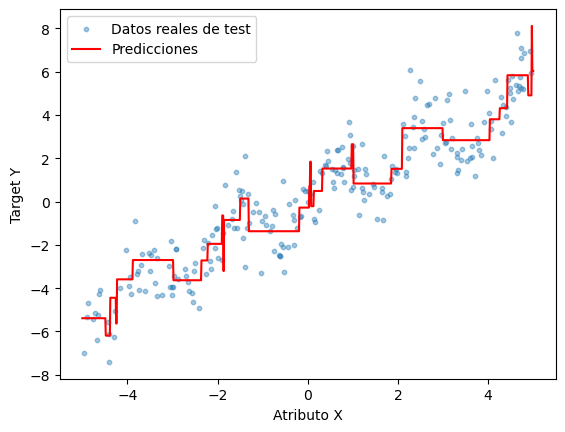

In [15]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_tree.predict(X_fit)

plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

[Text(0.4895833333333333, 0.9166666666666666, 'x[0] <= 0.03\nsquared_error = 10.4\nsamples = 750\nvalue = -0.091'),
 Text(0.24583333333333332, 0.75, 'x[0] <= -2.222\nsquared_error = 3.435\nsamples = 386\nvalue = -2.66'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[0] <= -4.234\nsquared_error = 2.128\nsamples = 222\nvalue = -3.771'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[0] <= -4.384\nsquared_error = 1.074\nsamples = 63\nvalue = -5.32'),
 Text(0.03333333333333333, 0.25, 'x[0] <= -4.484\nsquared_error = 0.942\nsamples = 50\nvalue = -5.5'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 0.988\nsamples = 43\nvalue = -5.387'),
 Text(0.05, 0.08333333333333333, 'squared_error = 0.103\nsamples = 7\nvalue = -6.191'),
 Text(0.1, 0.25, 'x[0] <= -4.254\nsquared_error = 0.976\nsamples = 13\nvalue = -4.627'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 0.936\nsamples = 11\nvalue = -4.444'),
 Text(0.11666666666666667, 0.08333333333333333, 'squ

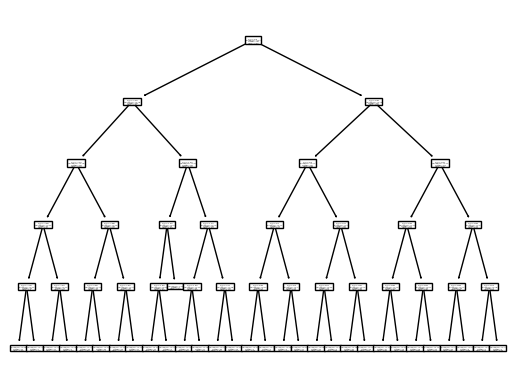

In [16]:
from sklearn import tree
tree.plot_tree(regr_tree)

## 7 MAX_DEPTH

In [17]:
regr_tree = DecisionTreeRegressor(max_depth=7)
regr_tree.fit(X_train, y_train)

y_train_pred = regr_tree.predict(X_train)
y_test_pred  = regr_tree.predict(X_test)

print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 0.93
La R^2 en los datos de test es: 0.89


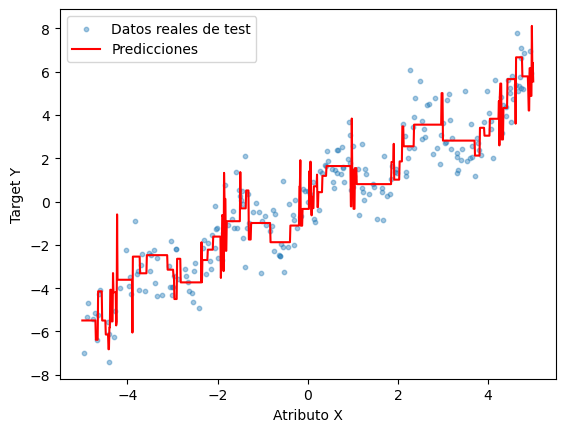

In [18]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_tree.predict(X_fit)

plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

## 30 MAX_DEPTH

In [19]:
regr_tree = DecisionTreeRegressor(max_depth=30)
regr_tree.fit(X_train, y_train)

y_train_pred = regr_tree.predict(X_train)
y_test_pred  = regr_tree.predict(X_test)

print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 0.8


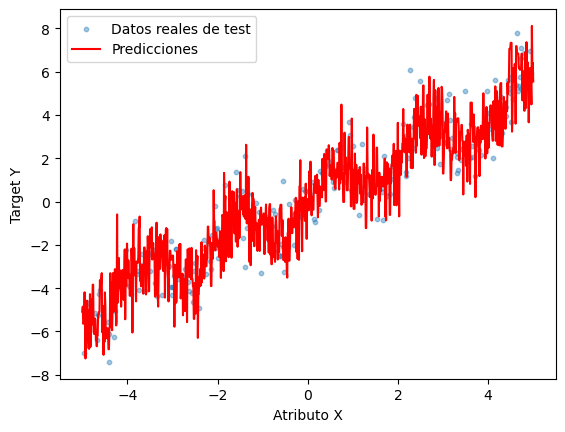

In [20]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_tree.predict(X_fit)

plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

## 50 MAX_DEPTH

In [21]:
regr_tree = DecisionTreeRegressor(max_depth=50)
regr_tree.fit(X_train, y_train)

y_train_pred = regr_tree.predict(X_train)
y_test_pred  = regr_tree.predict(X_test)

print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 0.8


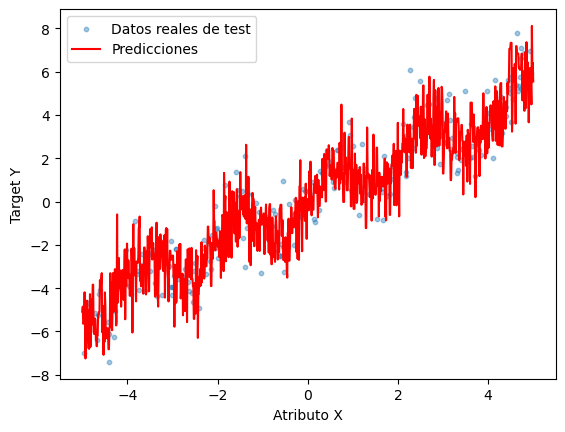

In [22]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_tree.predict(X_fit)

plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()